In [408]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [409]:
df=pd.read_csv("./datasets/titanic/train.csv")
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


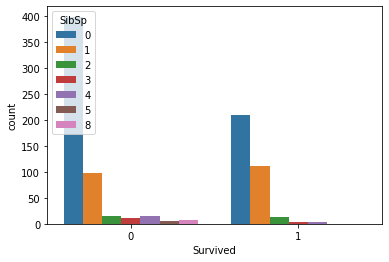

In [410]:
sns.countplot(x='Survived',hue='SibSp',data=df)

In [411]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embarked=pd.get_dummies(df['Embarked'],drop_first=True)
df=pd.concat([df,sex,embarked],axis=1)
df=df.drop(['PassengerId','Name','Ticket','Sex','Cabin','Embarked'],axis=1)
y=df.pop('Survived')
X=df
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,NaN,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [412]:
X['Age'].fillna(X['Age'].mean(),inplace=True)
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1
888,3,29.699118,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [413]:
lr=linear_model.LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
lr.fit(X_train,y_train)

/home/soumik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [414]:
y_pred=lr.predict(X_test)

In [415]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8135593220338984

In [450]:
df2=pd.read_csv("./datasets/titanic/test.csv")
sex=pd.get_dummies(df2['Sex'],drop_first=True)
embarked=pd.get_dummies(df2['Embarked'],drop_first=True)
ans=df2.pop('PassengerId')
df2=pd.concat([df2,sex,embarked],axis=1)
df2=df2.drop(['Name','Ticket','Sex','Cabin','Embarked'],axis=1)
df2['Age'].fillna(df2['Age'].mean(),inplace=True)
df2.reset_index()
X_=df2


In [454]:
X_.iloc[152,4]=0
y_=pd.Series(lr.predict(X_))
pd.concat([ans,y_],axis=1)
ans.to_csv("ans.csv")